In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import radians, sin, cos, sqrt, atan2
import warnings
import folium

# filter out warning messages
warnings.filterwarnings("ignore")

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('finalTrain.csv')
df

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,0xcdcd,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,12-02-2022,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,0xd987,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,13-02-2022,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,0x2784,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,04-03-2022,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,0xc8b6,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,13-02-2022,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,0xdb64,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,14-02-2022,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,0x7c09,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,0xd641,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,0x4f8d,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,0x5eee,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [3]:
df.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weather_conditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken (min)'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45584 entries, 0 to 45583
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45584 non-null  object 
 1   Delivery_person_ID           45584 non-null  object 
 2   Delivery_person_Age          43730 non-null  float64
 3   Delivery_person_Ratings      43676 non-null  float64
 4   Restaurant_latitude          45584 non-null  float64
 5   Restaurant_longitude         45584 non-null  float64
 6   Delivery_location_latitude   45584 non-null  float64
 7   Delivery_location_longitude  45584 non-null  float64
 8   Order_Date                   45584 non-null  object 
 9   Time_Orderd                  43853 non-null  object 
 10  Time_Order_picked            45584 non-null  object 
 11  Weather_conditions           44968 non-null  object 
 12  Road_traffic_density         44983 non-null  object 
 13  Vehicle_conditio

In [5]:
df.isnull().sum()

ID                                0
Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Order_Date                        0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
dtype: int64

In [6]:
df.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Vehicle_condition,multiple_deliveries,Time_taken (min)
count,43730.000000,43676.000000,45584.000000,45584.000000,45584.000000,45584.000000,45584.000000,44591.000000,45584.000000
mean,29.566911,4.633774,17.017948,70.229684,17.465480,70.844161,1.023385,0.744635,26.293963
std,5.815064,0.334744,8.185674,22.885575,7.335562,21.120578,0.839055,0.572510,9.384298
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,0.000000,0.000000,10.000000
25%,25.000000,4.500000,12.933284,73.170000,12.988453,73.280000,0.000000,0.000000,19.000000
50%,30.000000,4.700000,18.551440,75.897963,18.633934,76.002574,1.000000,1.000000,26.000000
75%,35.000000,4.900000,22.728163,78.044095,22.785049,78.107044,2.000000,1.000000,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,3.000000,3.000000,54.000000


In [7]:
for i in df.columns:
    print(f"no of unique values in {i} is {df[i].nunique()}")
    print("##################################################################################")
    if (df[i].nunique()) < 8:
        print(f"                unique values are {df[i].unique()}")
        print("##################################################################################")
    else:
        pass

no of unique values in ID is 45584
##################################################################################
no of unique values in Delivery_person_ID is 1320
##################################################################################
no of unique values in Delivery_person_Age is 22
##################################################################################
no of unique values in Delivery_person_Ratings is 28
##################################################################################
no of unique values in Restaurant_latitude is 657
##################################################################################
no of unique values in Restaurant_longitude is 518
##################################################################################
no of unique values in Delivery_location_latitude is 4373
##################################################################################
no of unique values in Delivery_location_longitude is 4373
##############

In [8]:
feature = []
dtypes = []
count = []
unique = []
missing = []
missing_percentage=[]

for column in df.columns:
    feature.append(column),
    dtypes.append(df[column].dtypes),
    count.append(df[column].count()),
    unique.append(df[column].unique()),
    missing.append(df[column].isnull().sum()),
    missing_percentage.append(df[column].isnull().sum()/df.shape[0]*100)

In [9]:
dataframe = pd.DataFrame({
    "feature":feature,
    "dtypes":dtypes,    
    "count":count,
    "unique":unique,
    "missing":missing,
    "missing_percentage":missing_percentage,

})
dataframe.set_index("feature")

,dtypes,count,unique,missing,missing_percentage
feature,,,,,
ID,object,45584,"[0xcdcd, 0xd987, 0x2784, 0xc8b6, 0xdb64, 0x3af...",0,0.000000
Delivery_person_ID,object,45584,"[DEHRES17DEL01, KOCRES16DEL01, PUNERES13DEL03,...",0,0.000000
Delivery_person_Age,float64,43730,"[36.0, 21.0, 23.0, 34.0, 24.0, 29.0, 35.0, 33....",1854,4.067217
Delivery_person_Ratings,float64,43676,"[4.2, 4.7, 4.3, 4.5, 4.0, 4.9, 4.1, 5.0, 4.8, ...",1908,4.185679
Restaurant_latitude,float64,45584,"[30.327968, 10.003064, 18.56245, 30.899584, 26...",0,0.000000
Restaurant_longitude,float64,45584,"[78.046106, 76.307589, 73.916619, 75.809346, 8...",0,0.000000
Delivery_location_latitude,float64,45584,"[30.397968, 10.043064, 18.65245, 30.919584, 26...",0,0.000000
Delivery_location_longitude,float64,45584,"[78.116106, 76.347589, 74.006619, 75.829346, 8...",0,0.000000
Order_Date,object,45584,"[12-02-2022, 13-02-2022, 04-03-2022, 14-02-202...",0,0.000000


In [10]:
# dropping the id column

df.drop('ID',axis=1,inplace=True)

### Changing the datetime column in datetime

In [11]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'], format='mixed', dayfirst=True)
df

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weather_conditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min)
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,22:10,Fog,Jam,2,Snack,motorcycle,3.0,No,Metropolitian,46
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,Stormy,High,1,Meal,motorcycle,1.0,No,Metropolitian,23
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,17:40,Sandstorms,Medium,1,Drinks,scooter,1.0,No,Metropolitian,21
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,Sandstorms,Low,0,Buffet,motorcycle,0.0,No,Metropolitian,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,Fog,Jam,1,Snack,scooter,1.0,No,Metropolitian,41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45579,JAPRES04DEL01,30.0,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35,11:45,Windy,High,1,Meal,motorcycle,0.0,No,Metropolitian,32
45580,AGRRES16DEL01,21.0,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55,20:10,Windy,Jam,0,Buffet,motorcycle,1.0,No,Metropolitian,36
45581,CHENRES08DEL03,30.0,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50,24:05:00,Cloudy,Low,1,Drinks,scooter,0.0,No,Metropolitian,16
45582,COIMBRES11DEL01,20.0,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35,13:40,Cloudy,High,0,Snack,motorcycle,1.0,No,Metropolitian,26


In [12]:
dtype = df['Order_Date'].dtypes
print(dtype)

datetime64[ns]


In [13]:
df['year']= df['Order_Date'].dt.year
df['month']= df['Order_Date'].dt.month
df['day']= df['Order_Date'].dt.day

In [14]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,...,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,2022-02-12,21:55,22:10,...,2,Snack,motorcycle,3.0,No,Metropolitian,46,2022,2,12
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,2022-02-13,14:55,15:05,...,1,Meal,motorcycle,1.0,No,Metropolitian,23,2022,2,13
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,2022-03-04,17:30,17:40,...,1,Drinks,scooter,1.0,No,Metropolitian,21,2022,3,4
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,2022-02-13,09:20,09:30,...,0,Buffet,motorcycle,0.0,No,Metropolitian,20,2022,2,13
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,2022-02-14,19:50,20:05,...,1,Snack,scooter,1.0,No,Metropolitian,41,2022,2,14


In [15]:
# removing the order_date column
df.drop('Order_Date',axis=1,inplace=True)

In [16]:
# removing the null value in the time ordered column
df.isnull().sum()

Delivery_person_ID                0
Delivery_person_Age            1854
Delivery_person_Ratings        1908
Restaurant_latitude               0
Restaurant_longitude              0
Delivery_location_latitude        0
Delivery_location_longitude       0
Time_Orderd                    1731
Time_Order_picked                 0
Weather_conditions              616
Road_traffic_density            601
Vehicle_condition                 0
Type_of_order                     0
Type_of_vehicle                   0
multiple_deliveries             993
Festival                        228
City                           1200
Time_taken (min)                  0
year                              0
month                             0
day                               0
dtype: int64

In [17]:
df.dropna(subset=['Time_Orderd'],inplace=True)

In [18]:
df['Time_Orderd'] = df['Time_Orderd'].str.replace('.', ':')# 12:00 12.00 12:00

In [19]:
df.shape

(43853, 21)

In [20]:
df['Time_Orderd'].sample(10)

41249          23:40
7413           19:55
24086          14:35
14517    0:916666667
20674          22:30
1893           18:15
42579           0:75
23879          20:30
14727          18:35
33589          17:15
Name: Time_Orderd, dtype: object

In [21]:
# Define a lambda function with error handling

def extract_time(x):
    try:
        return x.split(':')[0] + ':' + x.split(':')[1][:2]
    except IndexError:
        return '00:00'

# Apply the lambda function to the Order_Time column
df['Time_Orderd'] = df['Time_Orderd'].apply(extract_time)

In [22]:
df['Time_Orderd'].sample(20)

8870     12:45
700      18:15
39838    11:35
26515    11:25
32263    23:25
13445    00:00
15527    10:35
42571    00:00
8858     15:30
31686    22:35
36552     0:45
4596     23:25
44664    22:30
22375    22:25
32444    19:50
42196    12:10
33392    17:55
22680    23:50
2433     18:15
13289    18:10
Name: Time_Orderd, dtype: object

In [23]:
# Convert the Order_Time column to a time data type
df['Time_Orderd'] = pd.to_datetime(df['Time_Orderd'], format='%H:%M:%S',errors='ignore')

In [24]:
df['TimeOrder_Hour']=df['Time_Orderd'].str.split(':',expand=True)[0] # 12:00 -> 12, 00


# replacing '0' with '00'  - both indicate 24th hr 
df['TimeOrder_Hour']=df['TimeOrder_Hour'].replace('0','00') #12:00

# changing the datatype
df['TimeOrder_Hour']=df['TimeOrder_Hour'].astype('int32')

In [25]:
# order_minute
df['TimeOrder_min']=df['Time_Orderd'].str.split(':',expand=True)[1]

# changing the datatype
df['TimeOrder_min']=df['TimeOrder_min'].astype('int32')

In [26]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,motorcycle,3.0,No,Metropolitian,46,2022,2,12,21,55
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,motorcycle,1.0,No,Metropolitian,23,2022,2,13,14,55
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,scooter,1.0,No,Metropolitian,21,2022,3,4,17,30
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,motorcycle,0.0,No,Metropolitian,20,2022,2,13,9,20
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,scooter,1.0,No,Metropolitian,41,2022,2,14,19,50


In [27]:
# In ouir TimeOrder_Hour columns
# 7AM -12PM - breakfash
# 12PM -15 PM - lunch
# 15PM-17 PM- after lunch
# 17-19 -  evening snaks
# 19-24 - Dinner

### time_order_picked

In [28]:
df['Time_Order_picked'] = df['Time_Order_picked'].str.replace('.', ':')

In [29]:
# Apply the lambda function to the Order_Time column
df['Time_Order_picked'] = df['Time_Order_picked'].apply(extract_time)

In [30]:
# Convert the Order_Time column to a time data type
df['Time_Order_picked'] = pd.to_datetime(df['Time_Order_picked'], format='%H:%M:%S',errors='ignore')

In [31]:
df['Time_Order_picked_Hour']=df['Time_Order_picked'].str.split(':',expand=True)[0]



# changing the datatype
df['Time_Order_picked_Hour']=df['Time_Order_picked_Hour'].astype('int32')

In [32]:
# order_minute
df['Time_Order_picked_min']=df['Time_Order_picked'].str.split(':',expand=True)[1]

# changing the datatype
df['Time_Order_picked_min']=df['Time_Order_picked_min'].astype('int32')

In [33]:
# spilliting the Delivery_person_id  on the bases of "RES", this will give us the city name of delivery

df['Delivery_city']=df['Delivery_person_ID'].str.split('RES',expand=True)[0]

In [34]:
df.head()

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,City,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city
0,DEHRES17DEL01,36.0,4.2,30.327968,78.046106,30.397968,78.116106,21:55,22:10,Fog,...,Metropolitian,46,2022,2,12,21,55,22,10,DEH
1,KOCRES16DEL01,21.0,4.7,10.003064,76.307589,10.043064,76.347589,14:55,15:05,Stormy,...,Metropolitian,23,2022,2,13,14,55,15,5,KOC
2,PUNERES13DEL03,23.0,4.7,18.562450,73.916619,18.652450,74.006619,17:30,17:40,Sandstorms,...,Metropolitian,21,2022,3,4,17,30,17,40,PUNE
3,LUDHRES15DEL02,34.0,4.3,30.899584,75.809346,30.919584,75.829346,09:20,09:30,Sandstorms,...,Metropolitian,20,2022,2,13,9,20,9,30,LUDH
4,KNPRES14DEL02,24.0,4.7,26.463504,80.372929,26.593504,80.502929,19:50,20:05,Fog,...,Metropolitian,41,2022,2,14,19,50,20,5,KNP


In [35]:
df['Delivery_city'].unique()

array(['DEH', 'KOC', 'PUNE', 'LUDH', 'KNP', 'MUM', 'MYS', 'HYD', 'KOL',
       'RANCHI', 'COIMB', 'CHEN', 'JAP', 'SUR', 'BANG', 'GOA', 'AURG',
       'AGR', 'VAD', 'ALH', 'BHP', 'INDO'], dtype=object)

In [36]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city'],
      dtype='object')

In [37]:
df['Restaurant_latitude'].dtypes

dtype('float64')

In [38]:
df['Delivery_person_Ratings'].isnull().sum()

np.int64(268)

## filling the null value with the mean of that person id

In [39]:
rating_map = round(df.groupby('Delivery_person_ID')['Delivery_person_Ratings'].mean(),1).to_dict()

df['Delivery_person_Ratings']=df['Delivery_person_Ratings'].fillna(df['Delivery_person_ID'].map(rating_map))

# fillup the missing value in delivery_person_rating with the help of mean value of every delivery_person_id

In [40]:
rating_map

{'AGRRES010DEL01': 4.8,
 'AGRRES010DEL02': 4.7,
 'AGRRES010DEL03': 4.6,
 'AGRRES01DEL01': 4.5,
 'AGRRES01DEL02': 4.7,
 'AGRRES01DEL03': 4.6,
 'AGRRES02DEL01': 4.7,
 'AGRRES02DEL02': 4.6,
 'AGRRES02DEL03': 4.6,
 'AGRRES03DEL01': 4.7,
 'AGRRES03DEL02': 4.7,
 'AGRRES03DEL03': 4.7,
 'AGRRES04DEL01': 4.7,
 'AGRRES04DEL02': 4.8,
 'AGRRES04DEL03': 4.6,
 'AGRRES05DEL01': 4.7,
 'AGRRES05DEL02': 4.6,
 'AGRRES05DEL03': 4.7,
 'AGRRES06DEL01': 4.6,
 'AGRRES06DEL02': 4.7,
 'AGRRES06DEL03': 4.7,
 'AGRRES07DEL01': 4.6,
 'AGRRES07DEL02': 4.6,
 'AGRRES07DEL03': 4.6,
 'AGRRES08DEL01': 4.8,
 'AGRRES08DEL02': 4.7,
 'AGRRES08DEL03': 4.6,
 'AGRRES09DEL01': 4.7,
 'AGRRES09DEL02': 4.7,
 'AGRRES09DEL03': 4.6,
 'AGRRES11DEL01': 4.5,
 'AGRRES11DEL02': 4.6,
 'AGRRES11DEL03': 4.6,
 'AGRRES12DEL01': 4.6,
 'AGRRES12DEL02': 4.6,
 'AGRRES12DEL03': 4.5,
 'AGRRES13DEL01': 4.6,
 'AGRRES13DEL02': 4.5,
 'AGRRES13DEL03': 4.5,
 'AGRRES14DEL01': 4.7,
 'AGRRES14DEL02': 4.6,
 'AGRRES14DEL03': 4.6,
 'AGRRES15DEL01': 4.6,
 'AGRRES

In [41]:
df['Delivery_person_ID']

0           DEHRES17DEL01
1           KOCRES16DEL01
2          PUNERES13DEL03
3          LUDHRES15DEL02
4           KNPRES14DEL02
               ...       
45579       JAPRES04DEL01
45580       AGRRES16DEL01
45581      CHENRES08DEL03
45582     COIMBRES11DEL01
45583    RANCHIRES09DEL02
Name: Delivery_person_ID, Length: 43853, dtype: object

In [42]:

# now the missing value is null
df['Delivery_person_Ratings'].isnull().sum()

# now the missing value is null

np.int64(0)

## working with map

In [43]:
folium.Map(tiles="cartodb positron")

In [44]:
import folium

# Define the coordinates for the center of India (latitude, longitude)
india_center = [20.5937, 78.9629]

# Create a map centered around India with a zoom level of 5 (appropriate for showing the whole country)
m = folium.Map(location=india_center, zoom_start=5, tiles="cartodb positron")

# Display the map
m

In [45]:
import folium

# Define the coordinates for the center of India (latitude, longitude)
india_center = [20.5937, 78.9629]

# Create a map centered around India with a zoom level of 5 (appropriate for showing the whole country)
m = folium.Map(location=india_center, zoom_start=5, tiles="OpenStreetMap")

# Display the map
m

In [46]:
import folium

# Define the coordinates for the center of India (latitude, longitude)
india_center = [20.5937, 78.9629]

# Create a map centered around India with a zoom level of 5 (appropriate for showing the whole country)
m = folium.Map(location=india_center, zoom_start=5, tiles="OpenTopoMap")


# Display the map
m

In [47]:
m.save("open_topo_map.html")

In [57]:
# plotting the lattitude and longitude
import plotly.express as px
data1 = df.copy()
data1.dropna(axis=0,how='any',subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()
fig.write_html("scatter_mapbox.html")

In [55]:
print(data1.shape)  # Check if rows remain after dropping NA values


(43853, 26)


In [58]:
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` East



# this data set is realted to india. but in some of latitidude is given in negative(-), negative lattitude is related
# to indian ocean ..

# so that there is much chances that negative sign in lattitude is by mistake

In [59]:
# changing -ve to +ve dataset
"""
abs() function return the absolute value. The absolute
value of any number is always positive it removes the negative sign of a number in Python.
"""
df['Restaurant_latitude'] = df['Restaurant_latitude'].abs()

### To calculate the distance between two points on a sphere (such as the Earth), we can use the Haversine formula

In [60]:
import math

def distance(lat1, lon1, lat2, lon2):
    # Convert latitude and longitude to radians
    lat1, lon1, lat2, lon2 = map(math.radians, [lat1, lon1, lat2, lon2])
    
    # Haversine formula
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = math.sin(dlat/2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon/2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    R = 6371.0 # Earth's radius in km
    dist = R * c
    
    return dist
df['distance'] = df.apply(lambda row: distance(row['Restaurant_latitude'], row['Restaurant_longitude'],
                                                row['Delivery_location_latitude'], row['Delivery_location_longitude']), axis=1)

In [61]:
df['distance'].head()

0    10.280582
1     6.242319
2    13.787860
3     2.930258
4    19.396618
Name: distance, dtype: float64

In [62]:
df.groupby(['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude','Delivery_location_longitude'])['distance'].max().head(40)

Restaurant_latitude  Restaurant_longitude  Delivery_location_latitude  Delivery_location_longitude
0.000000             0.000000              0.010000                    0.010000                        1.572534
                                           0.020000                    0.020000                        3.145067
                                           0.030000                    0.030000                        4.717601
                                           0.040000                    0.040000                        6.290135
                                           0.050000                    0.050000                        7.862668
                                           0.060000                    0.060000                        9.435202
                                           0.070000                    0.070000                       11.007735
                                           0.080000                    0.080000                       12.580268
     

In [63]:
# droping those lattitude and longitude which are less than and above to
# latitude of india is 8°4` N  to 37°6` North
# longitude of india is 68°7` E to 97°25` Eas

In [64]:
df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].shape

# these 3509 record is of no use. bcz the wrong lattitude is mention

(3509, 27)

In [65]:
# droping  where  restaurant_lattitude and delivery_location_latitude less than 8

df = df.drop(df[(df['Restaurant_latitude'] < 8) & (df['Delivery_location_latitude'] < 8)].index)

In [66]:
df[(df['Restaurant_latitude'] > 37) & (df['Delivery_location_latitude'] > 37)]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


In [67]:
df[(df['Restaurant_longitude'] < 68) & (df['Delivery_location_longitude'] < 68)]

,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_Orderd,Time_Order_picked,Weather_conditions,...,Time_taken (min),year,month,day,TimeOrder_Hour,TimeOrder_min,Time_Order_picked_Hour,Time_Order_picked_min,Delivery_city,distance


In [68]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

### minimum distance

In [70]:
min_distance=df.groupby('distance')[['Restaurant_latitude','Restaurant_longitude','Delivery_location_latitude',
                        'Delivery_location_longitude']].min().sort_values(by='distance',ascending=True).head(5)
min_distance

,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude
distance,,,,
1.465067,30.914057,75.839820,30.924057,75.849820
1.465123,30.905562,75.832841,30.915562,75.842841
1.465140,30.902872,75.826808,30.912872,75.836808
1.465159,30.899992,75.831338,30.909992,75.841338
1.465161,30.899584,75.809346,30.909584,75.819346


In [72]:
import folium
from branca.element import Figure

fig2 = Figure(width=850, height=550)

# Create a map object centered on a specific location
m = folium.Map(location=[30.914057, 75.83982], zoom_start=12)

# Add a marker for the restaurant location
folium.Marker(location=[30.914057, 75.83982], popup="Restaurant", icon=folium.Icon(color='purple', prefix='fa', icon='anchor')).add_to(m)

# Add a marker for the delivery location
folium.Marker(location=[30.924057, 75.84982], popup="Delivery").add_to(m)

# Draw a line between the two locations
folium.PolyLine(locations=[[30.914057, 75.83982], [30.924057, 75.84982]], color='red').add_to(m)

# Adding custom tile layers with attribution
folium.TileLayer(
    'Stamen Terrain', 
    attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.'
).add_to(m)

folium.TileLayer(
    'Stamen Toner', 
    attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.'
).add_to(m)

folium.TileLayer(
    'Stamen Water Color', 
    attr='Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.'
).add_to(m)

folium.TileLayer(
    'cartodbpositron', 
    attr='Tiles &copy; CartoDB, under CC BY 3.0. Data by OpenStreetMap contributors.'
).add_to(m)

folium.TileLayer(
    'cartodbdark_matter', 
    attr='Tiles &copy; CartoDB, under CC BY 3.0. Data by OpenStreetMap contributors.'
).add_to(m)

# Add Layer Control
folium.LayerControl().add_to(m)

# Display the map in the figure
fig2.add_child(m)
m


In [73]:
m.save("map.html")

In [75]:
# plotting the lattitude and loggitude
import plotly.express as px
data1 = df.copy()
data1.dropna(axis=0,how='any',subset=None,inplace=True)
color_scale = [(0, 'orange'), (1,'red')]
fig = px.scatter_mapbox(data1, lat="Restaurant_latitude", lon="Restaurant_longitude", color_continuous_scale=color_scale,zoom=8, 
                        height=1000,width=1000)

fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

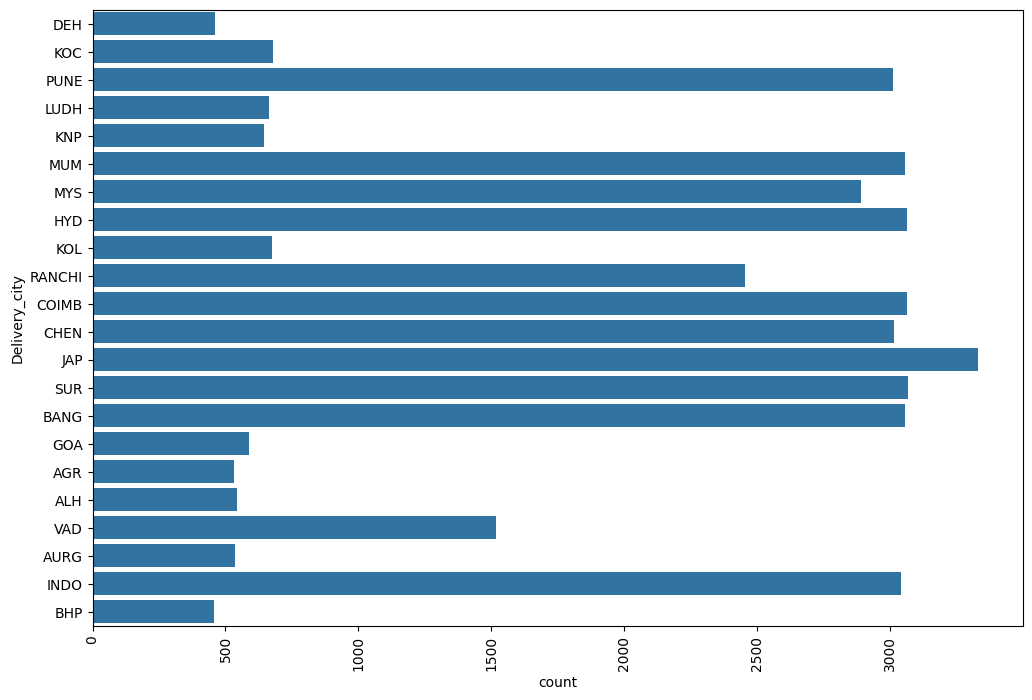

In [76]:
plt.figure(figsize=(12,8))
sns.countplot(df['Delivery_city'])
plt.xticks(rotation='vertical')
plt.show()

In [77]:
# cities like-  pune, mumbai, mysore, hyderabaad , chennai, banglore, indore, ranchi 
# in these cities more no. of food is ordered

In [78]:
df.columns

Index(['Delivery_person_ID', 'Delivery_person_Age', 'Delivery_person_Ratings',
       'Restaurant_latitude', 'Restaurant_longitude',
       'Delivery_location_latitude', 'Delivery_location_longitude',
       'Time_Orderd', 'Time_Order_picked', 'Weather_conditions',
       'Road_traffic_density', 'Vehicle_condition', 'Type_of_order',
       'Type_of_vehicle', 'multiple_deliveries', 'Festival', 'City',
       'Time_taken (min)', 'year', 'month', 'day', 'TimeOrder_Hour',
       'TimeOrder_min', 'Time_Order_picked_Hour', 'Time_Order_picked_min',
       'Delivery_city', 'distance'],
      dtype='object')

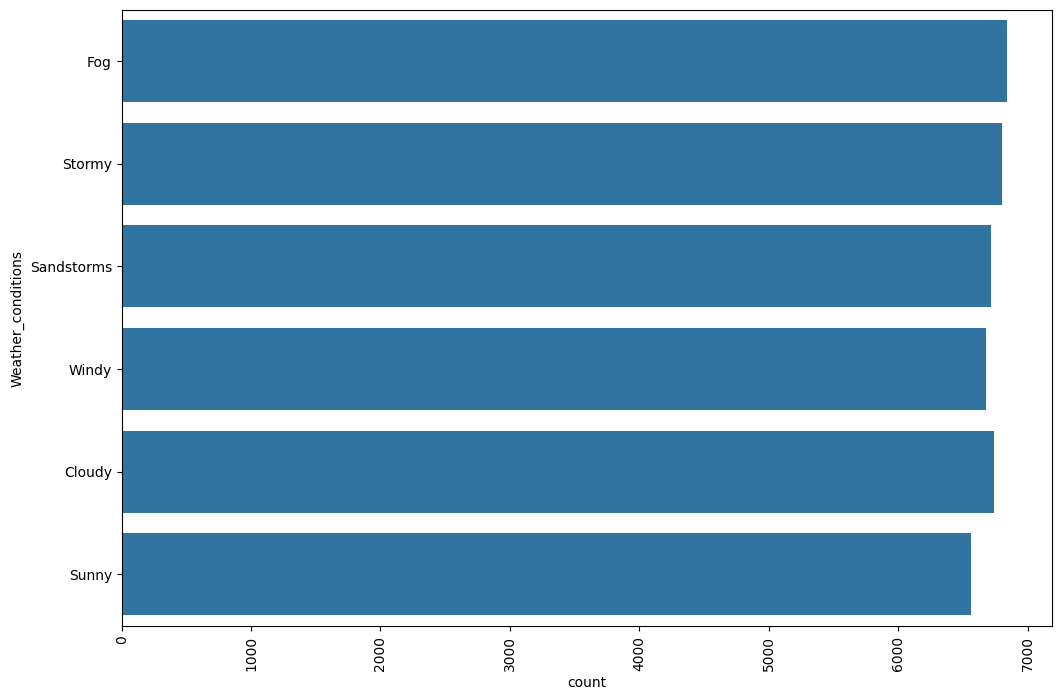

In [79]:
plt.figure(figsize=(12,8))
sns.countplot(df['Weather_conditions'])
plt.xticks(rotation='vertical')
plt.show()

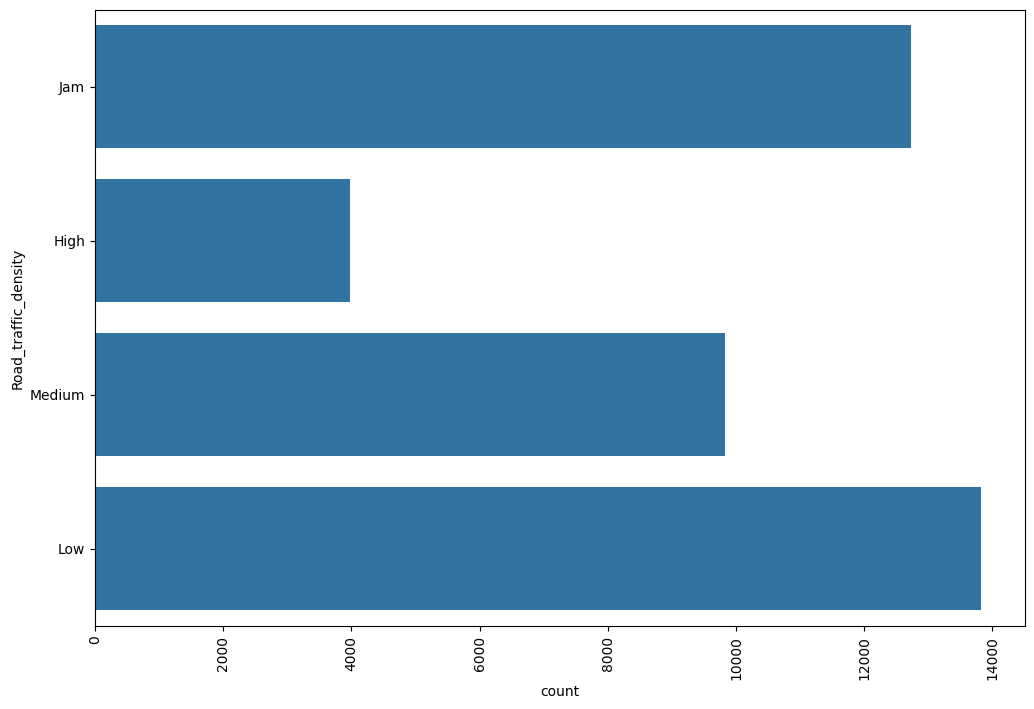

In [80]:
plt.figure(figsize=(12,8))
sns.countplot(df['Road_traffic_density'])
plt.xticks(rotation='vertical')
plt.show()

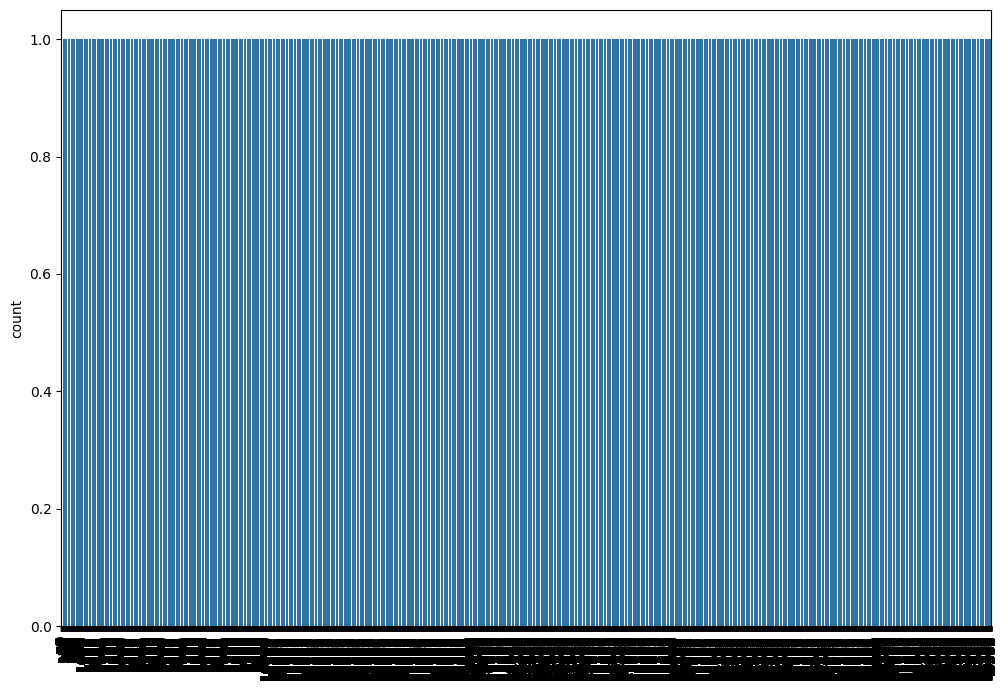

In [81]:
plt.figure(figsize=(12,8))
sns.countplot(df['Vehicle_condition'])
plt.xticks(rotation='vertical')
plt.show()

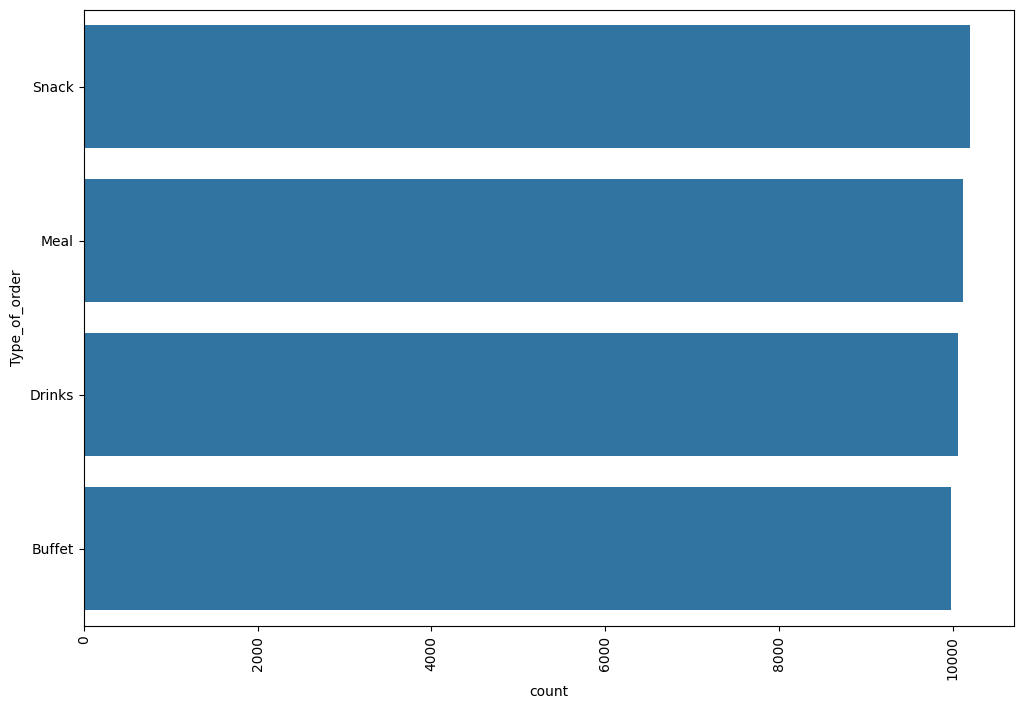

In [82]:
plt.figure(figsize=(12,8))
sns.countplot(df['Type_of_order'])
plt.xticks(rotation='vertical')
plt.show()

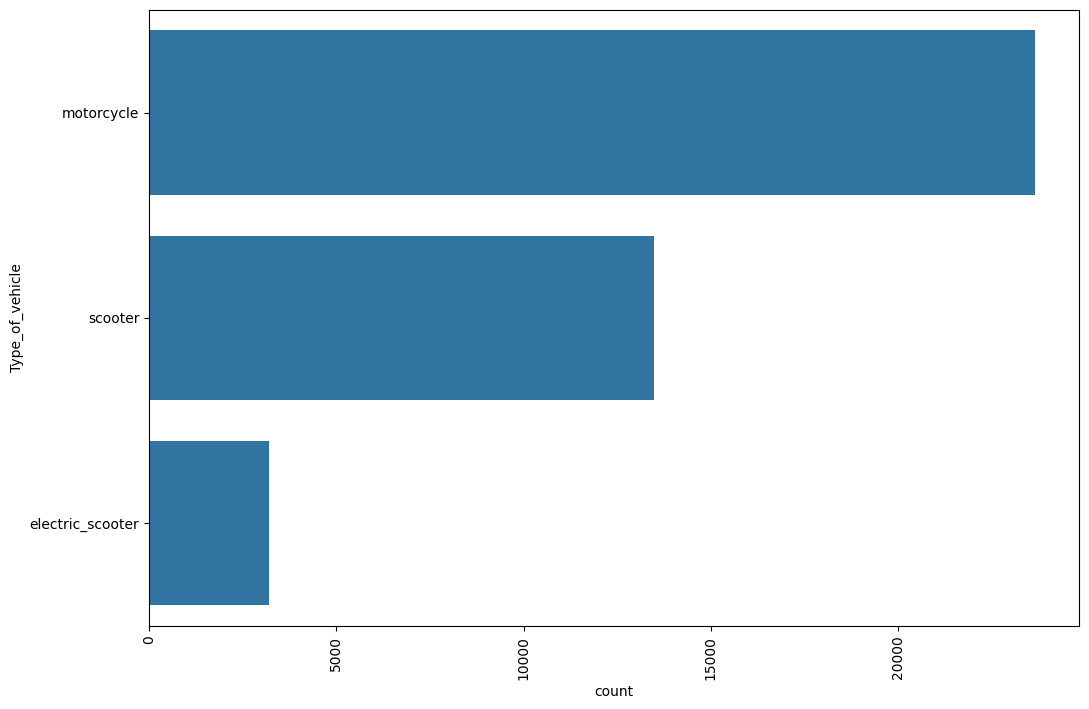

In [83]:
plt.figure(figsize=(12,8))
sns.countplot(df['Type_of_vehicle'])
plt.xticks(rotation='vertical')
plt.show()

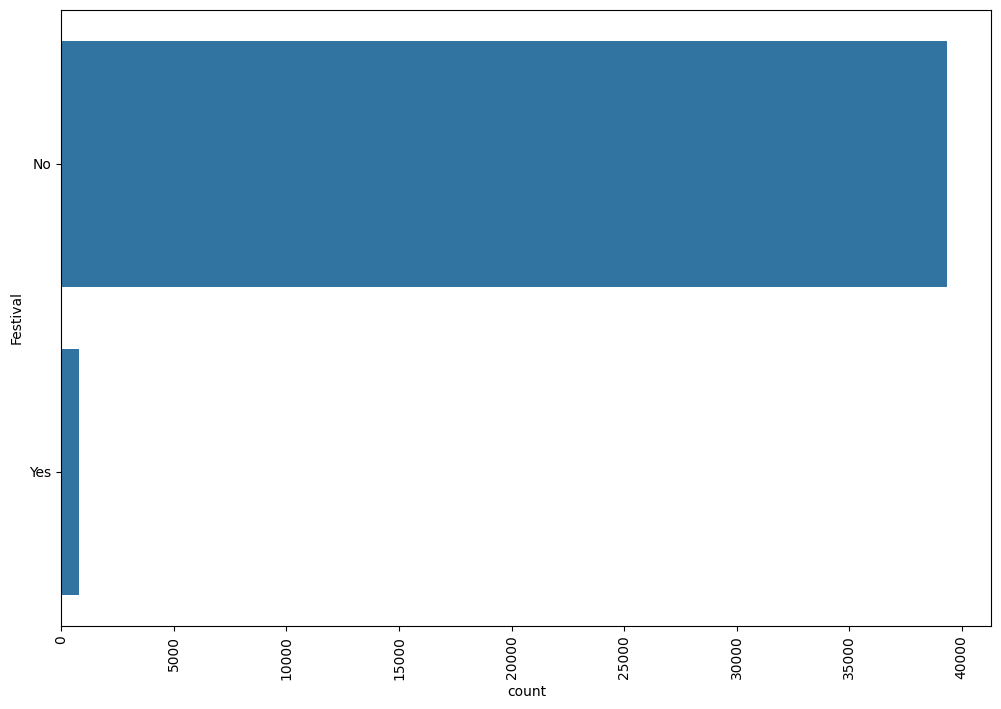

In [84]:
plt.figure(figsize=(12,8))
sns.countplot(df['Festival'])
plt.xticks(rotation='vertical')
plt.show()

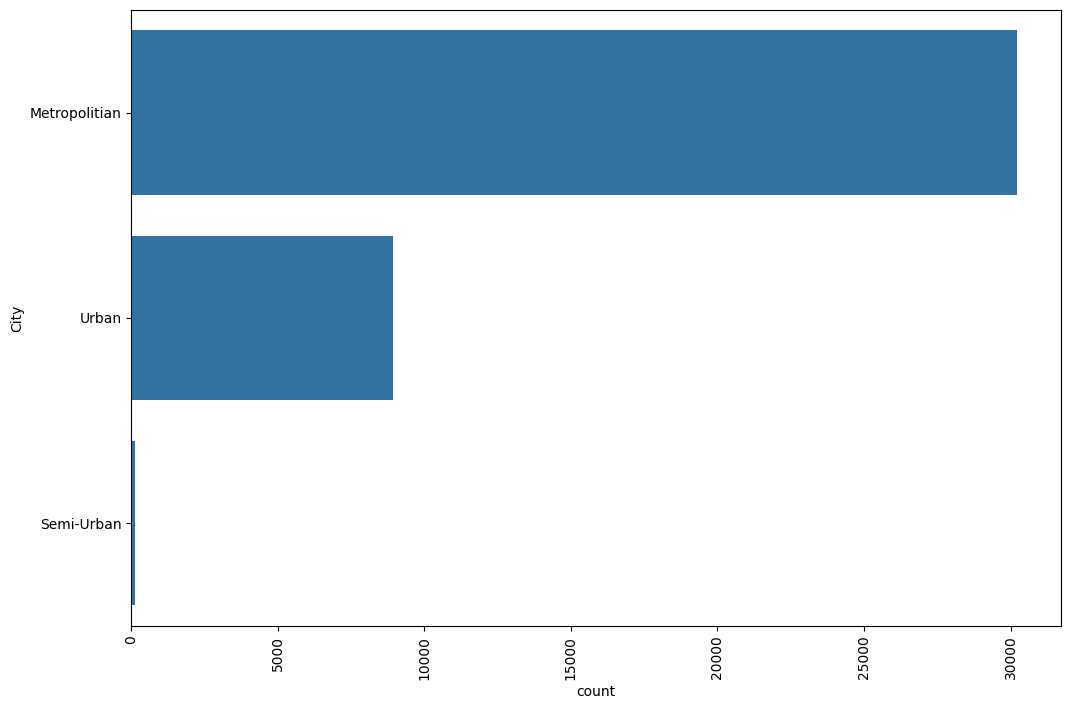

In [85]:
plt.figure(figsize=(12,8))
sns.countplot(df['City'])
plt.xticks(rotation='vertical')
plt.show()

In [86]:
# more no. of order is b/w 8 -11 and eveing 5 to night 12
# people more ofter deliver food in the evening and morning time

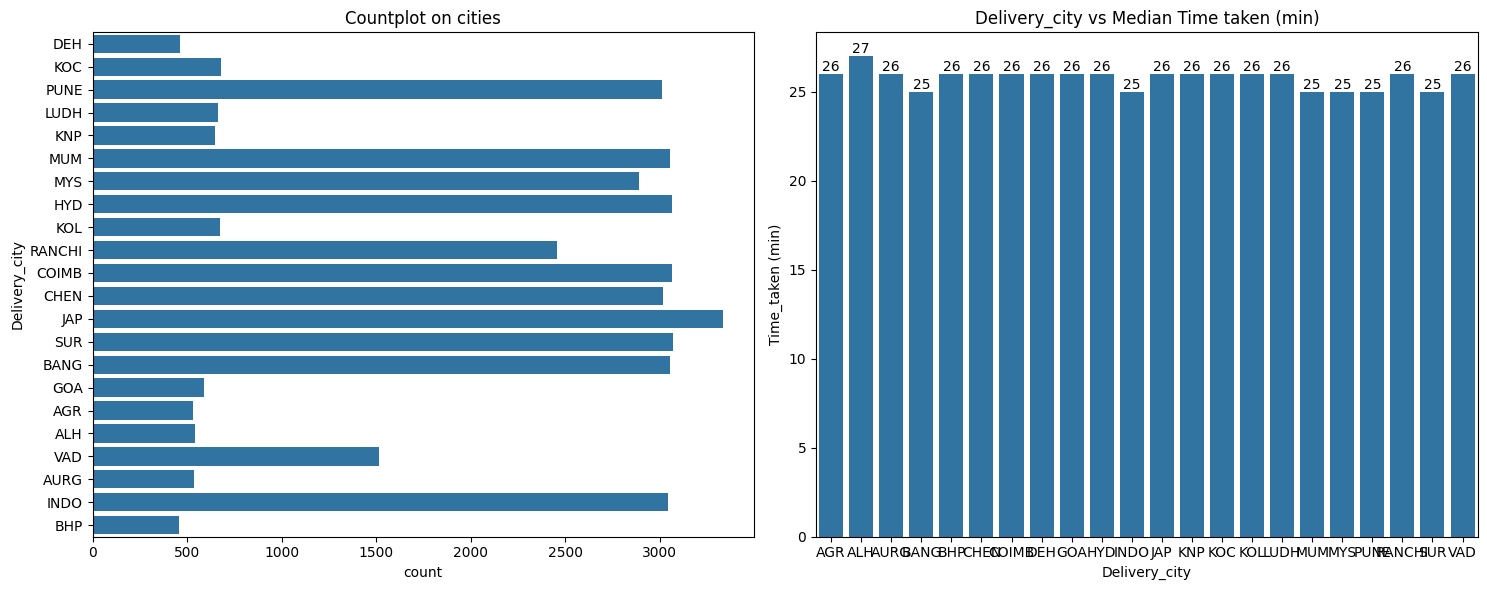

In [89]:
# Convert 'Time_taken (min)' column to numeric, forcing errors to NaN
df['Time_taken (min)'] = pd.to_numeric(df['Time_taken (min)'], errors='coerce')

# Now plot the countplot and bar plot
plt.figure(figsize=(15,6))

# Countplot of Delivery_city
plt.subplot(1,2,1)
sns.countplot(df['Delivery_city'])
plt.title("Countplot on cities")

# Bar plot with median Time_taken (min)
plt.subplot(1,2,2)
data1 = df.groupby(['Delivery_city'])['Time_taken (min)'].median().reset_index()
ax = sns.barplot(x='Delivery_city', y='Time_taken (min)', data=data1, errwidth=0)
plt.title('Delivery_city vs Median Time taken (min)')

# Add labels to the bars
plt.tight_layout()
for i in ax.containers:
    ax.bar_label(i)


In [ ]:
# plotting a countplot of City and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))
df['Time_taken (min)'] = pd.to_numeric(df['Time_taken (min)'], errors='coerce')
plt.subplot(1,2,1)
sns.countplot(df['City'])
plt.title("Countplot on City")

plt.subplot(1,2,2)
data1 = df.groupby(['City']).median().reset_index()
ax = sns.barplot(x='City', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('barplot on City with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)


In [ ]:
# plotting a countplot of Type_of_vehicle and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Type_of_vehicle'])
plt.title("Countplot on Type_of_vehicle")

plt.subplot(1,2,2)
data1 = df.groupby(['Type_of_vehicle']).median().reset_index()
ax = sns.barplot(x='Type_of_vehicle', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Type_of_vehicle with median Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
# plotting a countplot of Road traffic density and bar plot w.r.t median time taken min
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.countplot(df['Road_traffic_density'])
plt.title("Countplot on Road_traffic_density")

plt.subplot(1,2,2)
data1 = df.groupby(['Road_traffic_density']).median().reset_index()
ax = sns.barplot(x='Road_traffic_density', y='Time_taken (min)',
                data=data1,errwidth=0)
plt.title('Countplot on Road_traffic_density with mean Time taken in min')

plt.tight_layout()

for i in ax.containers:
    ax.bar_label(i,)

In [ ]:
# The avg delivery person age w.r.t Time taken in min
data1 = df.groupby(['Time_taken (min)']).mean().reset_index()

plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
sns.scatterplot(x='Delivery_person_Age',y='Time_taken (min)',data=data1)
plt.xlabel('Avg Delivery person age')
plt.ylabel("Time taken min")
plt.title('Avg age vs time taken')

plt.subplot(1,2,2)
sns.boxplot(y=df['Delivery_person_Age'])
plt.tight_layout()
plt.show()

In [ ]:
# as the age is increses the time of delivery is also inc.

In [ ]:
data1 = df.groupby(['Delivery_person_Ratings']).mean().reset_index()
data1.sort_values('Time_taken (min)',inplace=True)
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(data=data1.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')

data2 = df.groupby(['Delivery_person_Ratings']).median().reset_index()
data2.sort_values('Time_taken (min)',inplace=True)
plt.subplot(1,2,2)
sns.barplot(data=data2.head(10),x='Delivery_person_Ratings',y='Time_taken (min)')
plt.show()

In [ ]:
# person with lower rating is taking more time

In [88]:
numerical_feature=[feature for feature in df.columns if df[feature].dtypes != 'O']
numerical_feature

['Delivery_person_Age',
 'Delivery_person_Ratings',
 'Restaurant_latitude',
 'Restaurant_longitude',
 'Delivery_location_latitude',
 'Delivery_location_longitude',
 'Vehicle_condition',
 'multiple_deliveries',
 'Time_taken (min)',
 'year',
 'month',
 'day',
 'TimeOrder_Hour',
 'TimeOrder_min',
 'Time_Order_picked_Hour',
 'Time_Order_picked_min',
 'distance']

In [93]:
df.isnull().sum()

Delivery_person_ID                 0
Delivery_person_Age              200
Delivery_person_Ratings            0
Restaurant_latitude                0
Restaurant_longitude               0
Delivery_location_latitude         0
Delivery_location_longitude        0
Time_Orderd                        0
Time_Order_picked                  0
Weather_conditions                 0
Road_traffic_density               0
Vehicle_condition                  0
Type_of_order                      0
Type_of_vehicle                    0
multiple_deliveries              855
Festival                       40344
City                            1059
Time_taken (min)               40344
year                               0
month                              0
day                                0
TimeOrder_Hour                     0
TimeOrder_min                      0
Time_Order_picked_Hour             0
Time_Order_picked_min              0
Delivery_city                      0
distance                           0
d